Task 1. Development and testing of sentiment analysis

Step 1. Loading and preparing data

In [1]:
import pandas as pd


df = pd.read_csv("assets/Telegram.csv")
df.head()

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,App Name
0,0,gp:AOqpTOFcvRt1ZoHc8i2TkwI-5xEsP_s2sRbRWxxKUQH...,Daniel Robinson,https://play-lh.googleusercontent.com/a-/AOh14...,WhatsApp started being a problem so I switched...,3,539,8.6.0,2022-03-13 10:54:36,Sorry for the inconvenience – the latest versi...,2022-03-13 22:58:11,Telegram
1,1,gp:AOqpTOEYFNqyqXlCm_KXKDnKE5Y6bhlohBmtr8dbfcE...,Lavendeer 201,https://play-lh.googleusercontent.com/a-/AOh14...,App is great but it is annoying every time to ...,3,42,8.6.1,2022-03-16 08:00:00,NaN,NaN,Telegram
2,2,gp:AOqpTOH2yKBuvMVJ0_lYVWz9Pg3E30okUOAk1zFaUgi...,Shannon O'Brien,https://play-lh.googleusercontent.com/a-/AOh14...,I use Telegram on both my phone and laptop. I ...,5,38,8.6.1,2022-03-15 20:51:09,NaN,NaN,Telegram
3,3,gp:AOqpTOGg1_Mn9JLsOCoK0YZZqq1SbEP5tABZhrgcrMo...,Rustmane Skytrekker,https://play-lh.googleusercontent.com/a-/AOh14...,I loved this when it was just a simple messeng...,3,11,8.6.1,2022-03-17 12:00:09,NaN,NaN,Telegram
4,4,gp:AOqpTOHmOJ6TrfDBmFPetobSMKTkkxYEwawcB-0WD87...,M P,https://play-lh.googleusercontent.com/a/AATXAJ...,I've been using Telegram for at least 5-6 year...,1,67,8.6.0,2022-03-12 08:19:25,"Hello, you can try contacting support chat thr...",2022-03-12 16:10:39,Telegram


In [3]:
df = df[["content", "score"]].dropna(subset=["content", "score"])

def map_label(score):
    if score <= 2:
        return 0
    elif score == 3:
        return 1
    else:
        return 2

df["label"] = df["score"].apply(map_label)
df = df[["content", "score", "label"]]
df.to_csv("assets/Telegram_prepared.csv", index=False)

In [4]:
df.head()

,content,score,label
0,WhatsApp started being a problem so I switched...,3,1
1,App is great but it is annoying every time to ...,3,1
2,I use Telegram on both my phone and laptop. I ...,5,2
3,I loved this when it was just a simple messeng...,3,1
4,I've been using Telegram for at least 5-6 year...,1,0


In [5]:
from sklearn.model_selection import train_test_split


train_df, test_df = train_test_split(df, test_size=0.1, random_state=3773, stratify=df["label"])
train_df, val_df = train_test_split(train_df, test_size=0.1111, random_state=3773, stratify=train_df["label"])

print("Train:", train_df.shape, "Validation:", val_df.shape, "Test:", test_df.shape)

Train: (8000, 3) Validation: (1000, 3) Test: (1000, 3)


In [6]:
train_df.to_csv("assets/Telegram_train.csv", index=False)
val_df.to_csv("assets/Telegram_val.csv", index=False)
test_df.to_csv("assets/Telegram_test.csv", index=False)

Step 2. Text preprocessing

In [7]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


nltk.download("punkt")
nltk.download("punkt_tab") 
nltk.download("stopwords")
nltk.download("wordnet")

train_df = pd.read_csv("assets/Telegram_train.csv")
val_df = pd.read_csv("assets/Telegram_val.csv")
test_df = pd.read_csv("assets/Telegram_test.csv")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [8]:
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = str(text).lower()

    text = re.sub(r"http\S+|www\S+|@\w+|#\w+|\d+", " ", text)
    text = re.sub(r"[^a-z\s]", " ", text)

    tokens = word_tokenize(text)

    clean_tokens = []

    for t in tokens:
        if len(t) <= 1:
            continue
        if t in stop_words:
            continue

        lemma = lemmatizer.lemmatize(t)

        clean_tokens.append(lemma)
        
    return " ".join(clean_tokens)

In [9]:
train_df["clean_text"] = train_df["content"].apply(preprocess)
val_df["clean_text"] = val_df["content"].apply(preprocess)
test_df["clean_text"] = test_df["content"].apply(preprocess)

train_df.to_csv("assets/Telegram_train_preprocessed.csv", index=False)
val_df.to_csv("assets/Telegram_val_preprocessed.csv", index=False)
test_df.to_csv("assets/Telegram_test_preprocessed.csv", index=False)

In [10]:
train_df.head()

,content,score,label,clean_text
0,My account just has nothing now all my old gro...,1,0,account nothing old group channel saved messag...
1,"It keeps on connecting , starts working itself...",1,0,keep connecting start working stop problem cou...
2,I had very bad experience.The app was not reci...,1,0,bad experience app recieving message since man...
3,Overall the app is useful in many ways. I woul...,4,2,overall app useful many way would like suggest...
4,After installing the app it ask for mobile num...,1,0,installing app ask mobile number number additi...


Step 3. Converting texts into vectors

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer


train_df = pd.read_csv("assets/Telegram_train_preprocessed.csv")
val_df = pd.read_csv("assets/Telegram_val_preprocessed.csv")
test_df = pd.read_csv("assets/Telegram_test_preprocessed.csv")

In [12]:
train_df["clean_text"] = train_df["clean_text"].fillna("")
val_df["clean_text"] = val_df["clean_text"].fillna("")
test_df["clean_text"] = test_df["clean_text"].fillna("")

In [13]:
# Term Frequency - Inverse Document Frequency
tfidf = TfidfVectorizer(max_features=3000)

X_train = tfidf.fit_transform(train_df["clean_text"])
X_val = tfidf.transform(val_df["clean_text"])
X_test = tfidf.transform(test_df["clean_text"])

In [14]:
print("Train:", X_train.shape, "Val:", X_val.shape, "Test:", X_test.shape)

Train: (8000, 3000) Val: (1000, 3000) Test: (1000, 3000)


In [16]:
from nltk.sentiment import SentimentIntensityAnalyzer


# VADER - Valence Aware Dictionary and sEntiment Reasoner
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [17]:
sia = SentimentIntensityAnalyzer()

def get_sentiment_score(text):
    return sia.polarity_scores(str(text))["compound"]

In [18]:
train_df["sentiment_score"] = train_df["clean_text"].apply(get_sentiment_score)
val_df["sentiment_score"] = val_df["clean_text"].apply(get_sentiment_score)
test_df["sentiment_score"] = test_df["clean_text"].apply(get_sentiment_score)

In [19]:
train_df.to_csv("assets/Telegram_train_scored.csv", index=False)
val_df.to_csv("assets/Telegram_val_scored.csv", index=False)
test_df.to_csv("assets/Telegram_test_scored.csv", index=False)

In [20]:
train_df[["clean_text", "sentiment_score"]].head()

,clean_text,sentiment_score
0,account nothing old group channel saved messag...,-0.2484
1,keep connecting start working stop problem cou...,-0.2500
2,bad experience app recieving message since man...,-0.4939
3,overall app useful many way would like suggest...,0.7717
4,installing app ask mobile number number additi...,-0.4767


Step 4. Model training

In [21]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report


y_train = train_df["label"].values
y_val = val_df["label"].values
y_test = test_df["label"].values

In [22]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [23]:
lr = LogisticRegression(max_iter=1000, n_jobs=-1, class_weight='balanced',
                        multi_class='auto', solver='saga')
lr.fit(X_train, y_train)

c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(class_weight='balanced', max_iter=1000, multi_class='auto',
                   n_jobs=-1, solver='saga')

In [24]:
def compound_to_label(score, t_neg=-0.05, t_pos=0.05):
    if score < t_neg:
        return 0
    elif score > t_pos:
        return 2
    else:
        return 1

Step 5. Evaluation of quality

In [25]:
val_pred_nb = nb.predict(X_val)
test_pred_nb = nb.predict(X_test)

print("Confusion matrix:\n", confusion_matrix(y_val, val_pred_nb))
print("Accuracy:", accuracy_score(y_val, val_pred_nb))
print("F1-macro:", f1_score(y_val, val_pred_nb, average="macro"))

print("---------------------------------------")

print("Confusion matrix:\n", confusion_matrix(y_test, test_pred_nb))
print("Accuracy:", accuracy_score(y_test, test_pred_nb))
print("F1-macro:", f1_score(y_test, test_pred_nb, average="macro"))


Confusion matrix:
 [[450   0  54]
 [ 73   0  37]
 [ 99   0 287]]
Accuracy: 0.737
F1-macro: 0.516866140316616
---------------------------------------
Confusion matrix:
 [[456   0  48]
 [ 88   0  22]
 [ 95   0 291]]
Accuracy: 0.747
F1-macro: 0.5256722427768818


In [26]:
val_pred_lr = lr.predict(X_val)
test_pred_lr = lr.predict(X_test)

print("Confusion matrix:\n", confusion_matrix(y_val, val_pred_lr))
print("Accuracy:", accuracy_score(y_val, val_pred_lr))
print("F1-macro:", f1_score(y_val, val_pred_lr, average="macro"))

print("---------------------------------------")

print("Confusion matrix:\n", confusion_matrix(y_test, test_pred_lr))
print("Accuracy:", accuracy_score(y_test, test_pred_lr))
print("F1-macro:", f1_score(y_test, test_pred_lr, average="macro"))


Confusion matrix:
 [[362  88  54]
 [ 38  46  26]
 [ 56  56 274]]
Accuracy: 0.682
F1-macro: 0.600457957957958
---------------------------------------
Confusion matrix:
 [[360 107  37]
 [ 44  44  22]
 [ 46  64 276]]
Accuracy: 0.68
F1-macro: 0.597029846870477


In [27]:
val_lex_pred = []
for score in val_df["sentiment_score"]:
    val_lex_pred.append(compound_to_label(score))

test_lex_pred = []
for score in test_df["sentiment_score"]:
    test_lex_pred.append(compound_to_label(score))

print("Confusion matrix:\n", confusion_matrix(y_val, val_lex_pred))
print("Accuracy:", accuracy_score(y_val, val_lex_pred))
print("F1-macro:", f1_score(y_val, val_lex_pred, average="macro"))

print("---------------------------------------")

print("Confusion matrix:\n", confusion_matrix(y_test, test_lex_pred))
print("Accuracy:", accuracy_score(y_test, test_lex_pred))
print("F1-macro:", f1_score(y_test, test_lex_pred, average="macro"))


Confusion matrix:
 [[182  97 225]
 [ 25  18  67]
 [ 33  16 337]]
Accuracy: 0.537
F1-macro: 0.4342214380186493
---------------------------------------
Confusion matrix:
 [[180 102 222]
 [ 25  15  70]
 [ 25  18 343]]
Accuracy: 0.538
F1-macro: 0.42826749949153015


Step 6. Error analysis

In [28]:
val_df["pred_lr"] = val_pred_lr

errors_df = val_df[val_df["label"] != val_df["pred_lr"]]

print(len(errors_df))
errors_df[["content", "label", "pred_lr"]].head(10)

318


,content,label,pred_lr
4,This is Best Version of Telegram. Everything i...,2,1
5,"Dude plz do some to save the messages, or crea...",2,0
9,Please fix the problem where downloaded files ...,0,1
15,Movie or series is not opening from links give...,0,2
17,My telegram is not working properly it shown c...,2,0
19,Love the freedom of being able to send large f...,2,0
24,"In the test we give, the bot gives a low numbe...",0,2
26,"Everything was fine up until now. The ""Save to...",0,1
28,My experience with telegram has not been a goo...,1,2
34,App is not working properly.....I downloaded s...,0,1


In [29]:
for i in range(5):
    row = errors_df.iloc[i]
    print(f"\nText: {row['content']}")
    print(f"True label: {row['label']} | Predicted: {row['pred_lr']}")


Text: This is Best Version of Telegram. Everything is fine with Download Video/Images. When Everyone is facing problems With Downloaded File(Folder) and searching but couldn't find. Please contact us for more info on Telegram @TheExcel2
True label: 2 | Predicted: 1

Text: Dude plz do some to save the messages, or create a back-up option ,so that we can restore it later , plz help in this
True label: 2 | Predicted: 0

Text: Please fix the problem where downloaded files wont show up in the file manager. This happened after upgrading to Android 11
True label: 0 | Predicted: 1

Text: Movie or series is not opening from links given reload option there on chrome 😑
True label: 0 | Predicted: 2

Text: My telegram is not working properly it shown connecting and connecting msg notification are shown but when i open my app its shown connecting . i updated the app but problem is still there so what should i do?
True label: 2 | Predicted: 0


### Error analysis
**Incorrectly classified examples:**
1. “This is Best Version of Telegram. Everything is fine … but couldn’t find …”
   - **True label:** Positive  
   - **Predicted:** Neutral  
   - **Reason:** The model is confused by mixed tone — the review starts positively but ends with a complaint.

2. “Dude plz do some to save the messages, or create a back-up option …”
   - **True label:** Positive  
   - **Predicted:** Negative  
   - **Reason:** Contains polite requests (“plz help”) which are misinterpreted as frustration.

3. “Movie or series is not opening from links given …”
   - **True label:** Negative  
   - **Predicted:** Positive  
   - **Reason:** The negation “not opening” was lost during preprocessing or vectorization.

4. “My telegram is not working properly … problem is still there …”
   - **True label:** Positive  
   - **Predicted:** Negative  
   - **Reason:** The sentence structure is long and repetitive; model fails to detect polarity shift.

5. “After downloading a movie … it downloads again. Why is this?”
   - **True label:** Positive  
   - **Predicted:** Neutral  
   - **Reason:** The question form is misinterpreted; model doesn’t capture annoyance tone.


### Causes of errors
- **Negation handling:** Words like “not”, “never”, “no” were removed as stopwords, breaking the sentiment logic.  
- **Mixed or sarcastic tone:** Positive and negative phrases appear together.  
- **Polysemous expressions:** Words like *fine*, *good*, *working* can mean different things in context.  
- **Preprocessing limitations:** Lemmatization and stopword filtering may remove emotional words.  
- **Imbalanced dataset:** Neutral class is underrepresented, causing frequent confusion.


### Proposed improvements
- Keep **negation words** (“not”, “no”, “never”) during preprocessing.  
- Expand the **sentiment lexicon** with domain-specific Telegram terms (e.g., “bot”, “channel”, “backup”).  
- Use **contextual models** (e.g., BERT, RoBERTa) that understand sarcasm and multi-clause structure.  
- Apply **data balancing** (e.g., oversampling neutral examples).  
- Perform **threshold tuning** for neutral class to reduce misclassification between 1 ↔ 2.


Step 7. Visualization

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


pos_text = " ".join(train_df[train_df["label"] == 2]["clean_text"])
neg_text = " ".join(train_df[train_df["label"] == 0]["clean_text"])

wordcloud_pos = WordCloud(width=800, height=400, background_color="white").generate(pos_text)
wordcloud_neg = WordCloud(width=800, height=400, background_color="white").generate(neg_text)

<function matplotlib.pyplot.show(close=None, block=None)>

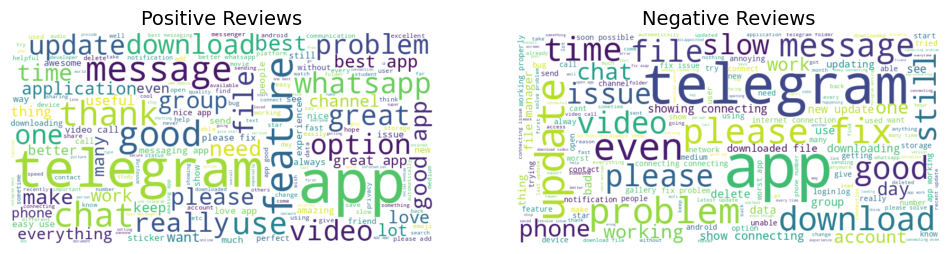

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_pos, interpolation="bilinear")
plt.axis("off")
plt.title("Positive Reviews", fontsize=14)

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_neg, interpolation="bilinear")
plt.axis("off")
plt.title("Negative Reviews", fontsize=14)

plt.show

In [ ]:
import numpy as np

feature_names = np.array(tfidf.get_feature_names_out())
coeffs = lr.coef_

top_neg_indices = np.argsort(coeffs[0])[: -16 : -1]
top_pos_indices = np.argsort(coeffs[2])[: -16 : -1]

print("Top positive words:", feature_names[top_pos_indices])
print("Top negative words:", feature_names[top_neg_indices])

Top positive words: ['best' 'amazing' 'thank' 'great' 'love' 'perfect' 'wonderful' 'excellent'
 'useful' 'thanks' 'good' 'awesome' 'easy' 'status' 'messenger']
Top negative words: ['worst' 'connecting' 'useless' 'bad' 'pathetic' 'even' 'update' 'code'
 'anymore' 'stupid' 'irritating' 'disappointed' 'suck' 'install'
 'internet']
